<a href="https://colab.research.google.com/github/Dimassaputra5/GDGOC/blob/main/P3_Prediksi_Harga_Mobile_Phone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Silahkan kerjakan Final Project mu disini ya ☺️🙏

# **Prediksi Harga Mobile Phone**
Link Dataset: [Here](https://drive.google.com/file/d/1BEzYGaWuiFmXAXtrQLVbFmqCCJ9-GzHK/view?usp=sharing)



Here is the Case:

Seorang calon pembeli smartphone merasa bingung memilih ponsel yang sesuai dengan kebutuhan dan anggarannya. Dengan banyaknya pilihan di pasaran, ia kesulitan membandingkan fitur seperti RAM, kapasitas baterai, kualitas kamera, prosesor, hingga apakah ponsel tersebut mendukung fast charging atau tidak. Untuk membantu pengambilan keputusan, calon pembeli ini memiliki dataset spesifikasi ponsel yang mencakup informasi seperti nama ponsel, perusahaan, rating, spesifikasi teknis (RAM, baterai, kamera, layar, prosesor), dukungan jaringan (3G, 4G, 5G, VoLTE), versi Android, dan harga ponsel.
Sebagai seorang machine learning engineer, kamu akan menggunakan Linear Regression untuk memprediksi harga ponsel berdasarkan spesifikasinya. Dengan menganalisis hubungan antara spesifikasi ponsel dan harga, model ini dapat memperkirakan berapa harga yang wajar untuk ponsel dengan fitur tertentu. Prediksi ini akan membantu calon pembeli membuat keputusan yang lebih tepat, memahami apakah ponsel tersebut worth it dibandingkan dengan spesifikasi yang ditawarkan, serta memudahkan mereka dalam memilih ponsel sesuai kebutuhan dan anggaran.
1.	Name: This column contains the name of the mobile phone.
2.	Rating: This column contains the ratings given to the phone. the minimum rating is 0. and maximum rating is 5.
3.	Spec_score: This column contains the score given to the phone on the basic of its specifications. This minimum value is 0 and maximum value is 100.
4.	No_of_sim: This column contains whether the phone is dual sim, has 3g, 4g, 5g, volte.
5.	RAM: This column contains the information about the RAM of the phone
6.	Battery: This column provides information about battery specification of the phone.
7.	Display: This column contains information about the screen size of the phone.
8.	Camera: This column provides information about the camera, rear and front.
9.	External_Memory: This column contains information whether a device support external memory and
10.	how much.
11.	Android_version: This column tells us about the android version of the phone.
12.	Price: Price of the phone.
13.	Company: The company to which the phone belongs.
14.	Inbuilt_memory: This column provides information about the inbuilt memory of the phone.
15.	fast_charging: It contains whether the device supports fast charging or not. if yes then how much.
16.	Screen_resolution: This describes the screen resolution of the phone.
17.	Processor: This column gives information about the processor of the phone.
18.	Processor_name: This column describes the name of the processor.


### Import library

In [765]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Data Preparation**

## *Pengumpulan data*

In [766]:
# mengambil dataset dan menampilkan data
df = pd.read_csv('/content/mobile phone price prediction.csv')
# external memory tidak masuk
# company tidak masuk
# android version tidak masuk
# fast charging tidak masuk
df.head(5)

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


## *Identifikasi setiap fitur/kolom*

In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [768]:
for i in df.columns:
  print(df[i].value_counts())
  print("-"*10)

Unnamed: 0
1369    1
0       1
1       1
2       1
3       1
       ..
29      1
30      1
31      1
32      1
33      1
Name: count, Length: 1370, dtype: int64
----------
Name
Realme Narzo N55 (6GB RAM + 128GB)    3
OnePlus Nord CE 3 5G                  2
Vivo S19 Pro                          2
Realme 7                              2
Vivo V25 Pro (12GB RAM + 256GB)       2
                                     ..
Poco C61 (6GB RAM + 128GB)            1
iQOO 9 Pro 5G (12GB RAM + 256GB)      1
iQOO 13 Pro                           1
iQOO 9 Pro 5G                         1
Poco C60                              1
Name: count, Length: 1334, dtype: int64
----------
Rating
4.15    98
4.65    94
4.40    94
4.30    93
4.55    93
4.35    88
4.50    87
4.45    86
4.60    86
4.00    85
4.70    78
4.75    77
4.10    76
4.25    75
4.05    74
4.20    73
3.95     8
3.90     3
3.75     1
3.85     1
Name: count, dtype: int64
----------
Spec_score
75    96
84    93
86    91
85    82
89    80
83    65
88 

In [769]:
# mencari tau data type dan indentifikasi setiap fitur dan kolom
df.value_counts("Rating")
df.value_counts("Spec_score")
df.value_counts("No_of_sim")
df.value_counts("Ram")
df.value_counts("Battery")
df.value_counts("Display")
df.value_counts("Camera")
df.value_counts("Screen_resolution")
df.value_counts("Processor")
df.value_counts("Processor_name")
# terdapat data yang error pada kolom: Ram, Battery

,count
Processor_name,
Snapdragon 8+ Gen1,58
Snapdragon 8 Gen2,55
Snapdragon 8 Gen3,44
Snapdragon 695,36
Snapdragon 680,34
...,...
Unisoc T606,1
Snapdragon 8+ Gen 1,1
Snapdragon 8+ Gen 1,1


In [770]:
print(df['Price'].unique())

['9,999' '9,990' '11,999' '11,990' '11,599' '12,298' '14,999' '14,990'
 '14,949' '19,999' '19,990' '19,799' '19,499' '18,999' '18,990' '20,999'
 '29,999' '28,990' '30,500' '30,999' '39,999' '39,990' '38,900' '37,999'
 '41,289' '41,790' '42,990' '42,999' '49,999' '49,990' '49,000' '47,990'
 '44,999' '44,990' '51,999' '54,990' '54,999' '59,999' '57,990' '64,999'
 '65,690' '69,990' '69,999' '70,000' '1,99,990' '1,84,999' '1,79,990'
 '1,77,999' '1,64,999' '1,59,999' '1,54,999' '1,39,999' '1,30,376'
 '1,29,999' '6,990' '6,999' '7,499' '7,999' '8,033' '8,199' '8,490'
 '9,499' '10,199' '10,499' '11,899' '11,580' '11,490' '11,390' '10,999'
 '12,350' '12,490' '15,050' '29,990' '29,799' '30,739' '31,398' '31,990'
 '38,990' '38,799' '37,990' '40,990' '49,940' '48,990' '46,990' '45,990'
 '45,210' '50,999' '56,990' '58,990' '62,990' '63,999' '64,990' '65,490'
 '71,990' '74,899' '76,990' '79,999' '80,990' '1,39,990' '1,18,990'
 '1,15,990' '1,13,990' '1,10,990' '1,09,990' '1,07,990' '1,06,990'
 '99,9

In [771]:
# cek baris dan kolom
df.shape

(1370, 18)

## *Mendeskripsikan data*

In [772]:
# mendeskripsikan data number(float dan integer)
df.describe()

,Unnamed: 0,Rating,Spec_score
count,1370.000000,1370.000000,1370.000000
mean,684.500000,4.374416,80.234307
std,395.629246,0.230176,8.373922
min,0.000000,3.750000,42.000000
25%,342.250000,4.150000,75.000000
50%,684.500000,4.400000,82.000000
75%,1026.750000,4.550000,86.000000
max,1369.000000,4.750000,98.000000


In [773]:
# mendeskripsikan data object
df.describe(include='object')

,Name,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
count,1370,1370,1370,1370,1370,1370,1370,927,1370,1370,1351,1281,1368,1342,1370
unique,1334,9,16,89,89,347,85,23,449,26,10,38,141,14,276
top,Realme Narzo N55 (6GB RAM + 128GB),"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.7 inches,50 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"29,990",Vivo,128 GB inbuilt,18W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 8+ Gen1
freq,3,818,528,693,158,81,233,280,37,186,644,157,357,1237,58


## *Identifikasi missing value*

In [774]:
# identifikasi missing value
df.isnull().sum()

,0
Unnamed: 0,0
Name,0
Rating,0
Spec_score,0
No_of_sim,0
Ram,0
Battery,0
Display,0
Camera,0
External_Memory,0


## *Identifikasi outlier*

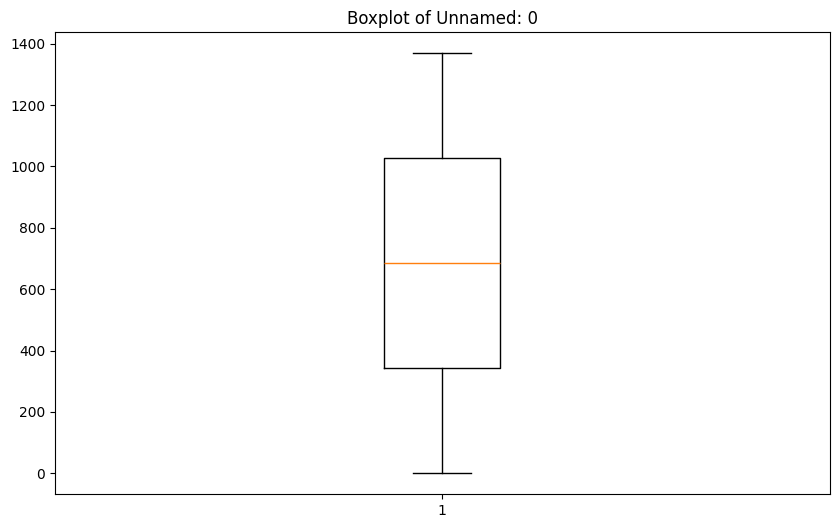

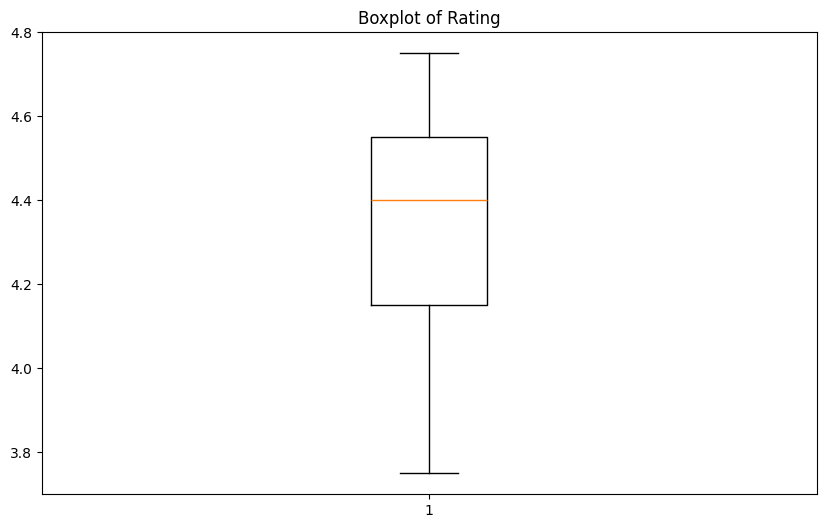

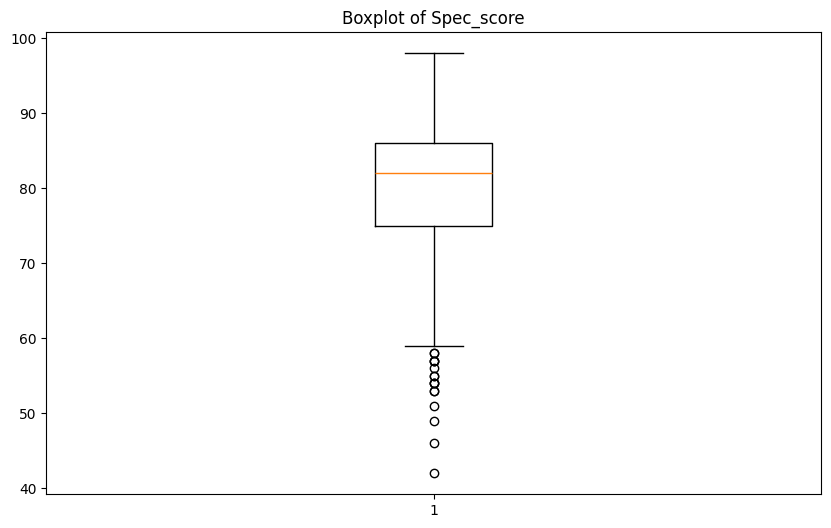

In [775]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
  plt.figure(figsize=(10, 6))
  plt.boxplot(df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

## *Identifikasi data duplicate*

In [776]:
df.duplicated().sum()

np.int64(0)

## *Univariate, Bivariate, dan Multivariate Analysis*

### Univariate analysis

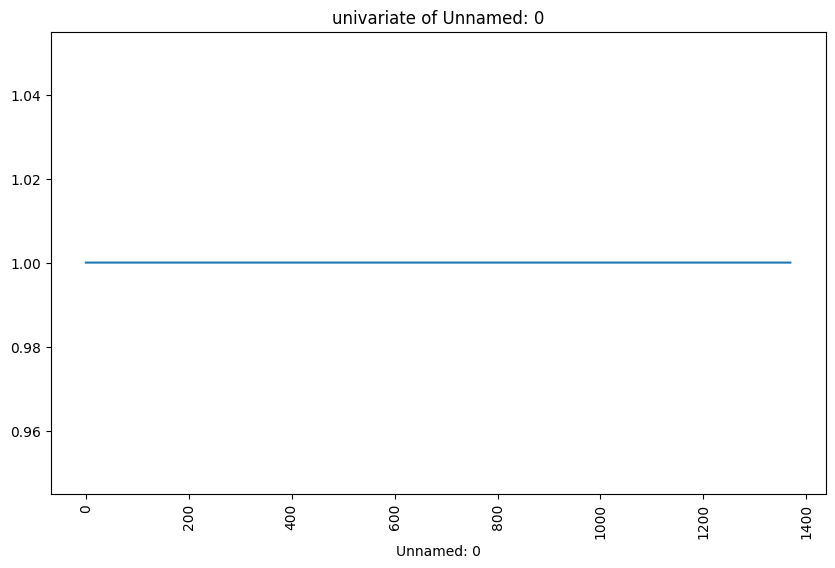

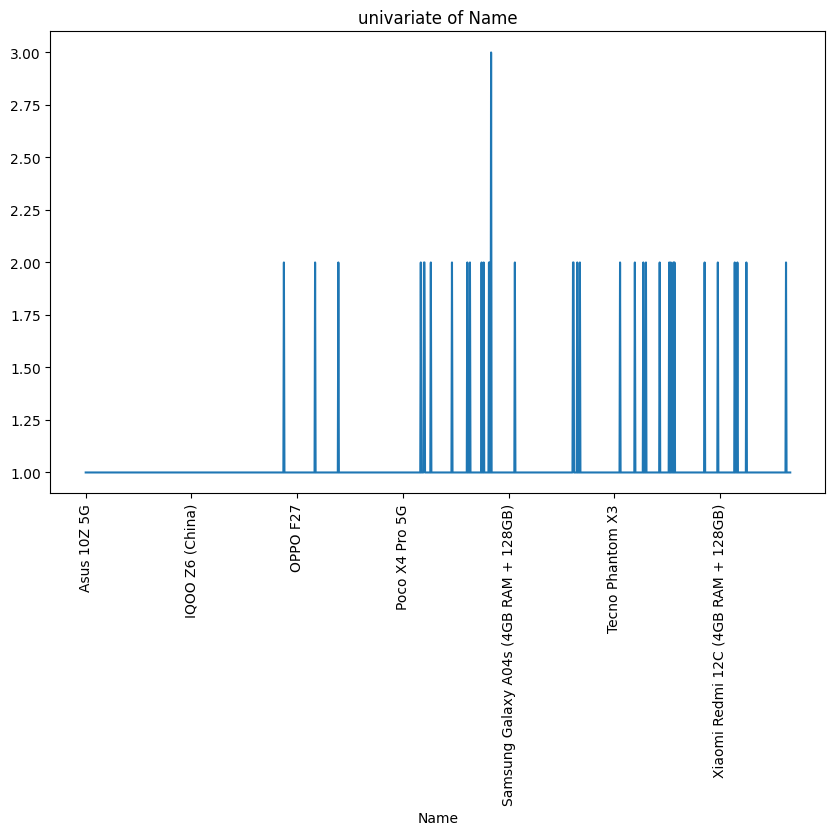

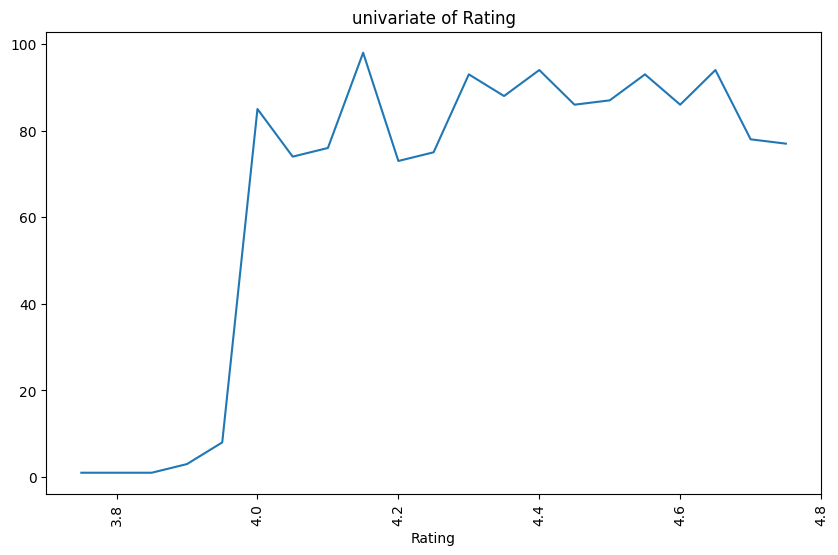

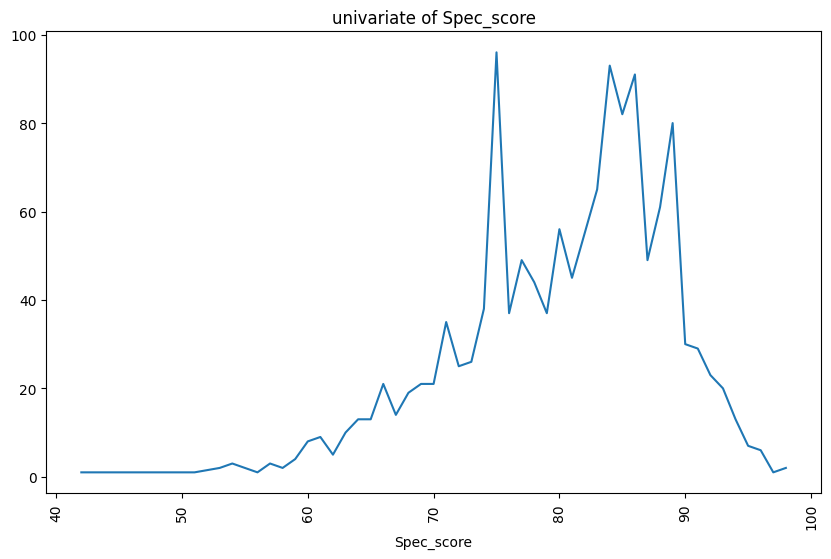

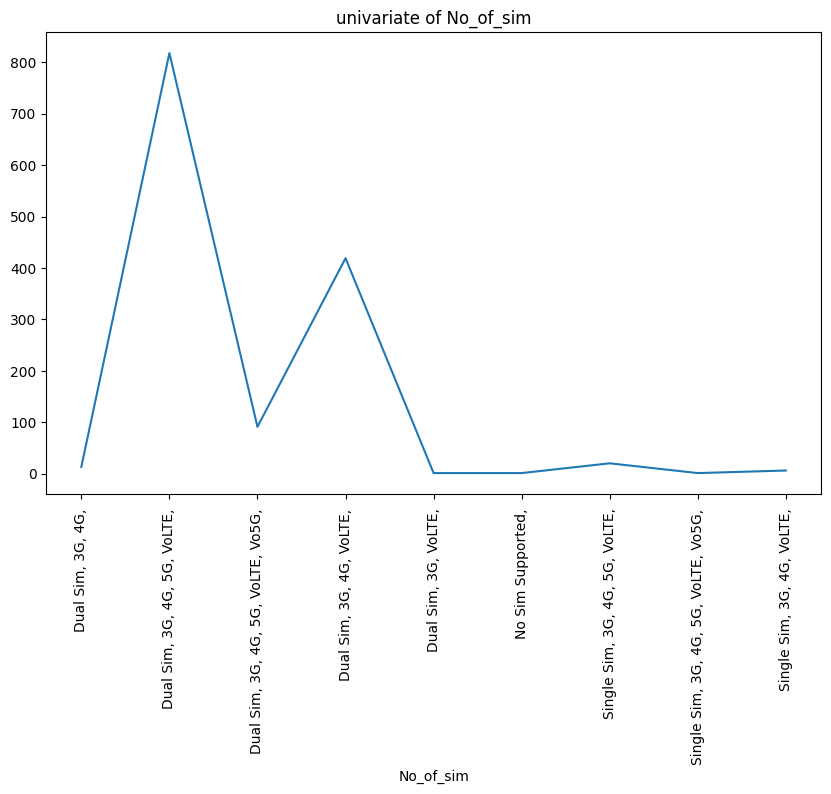

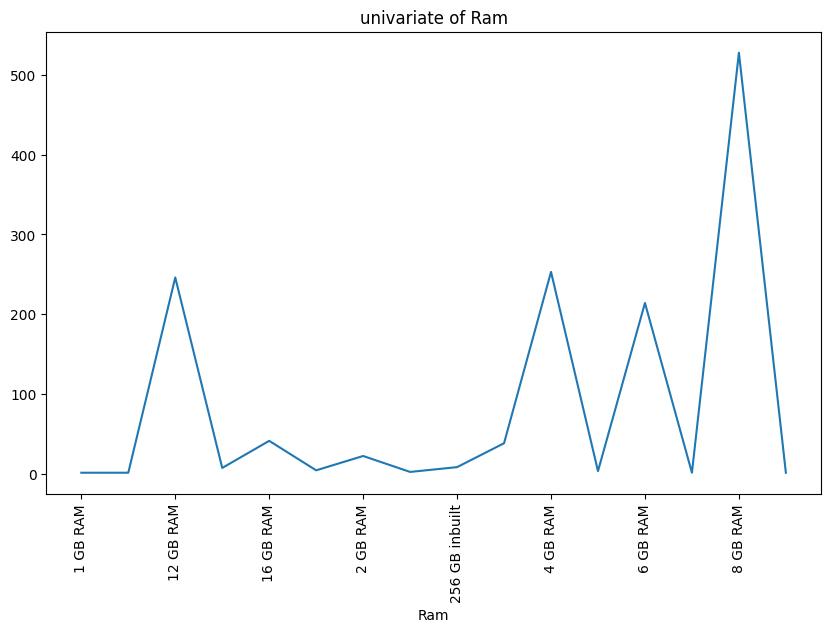

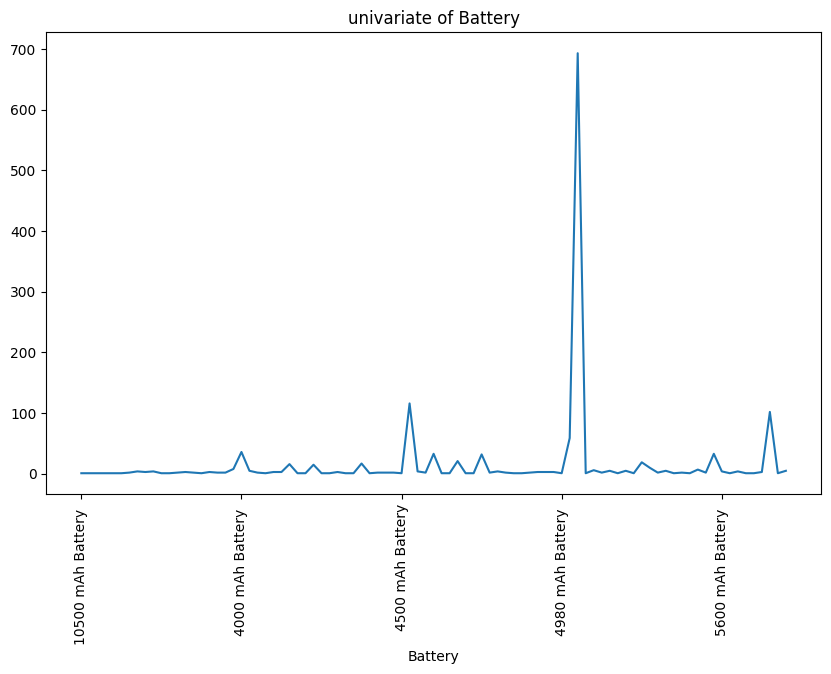

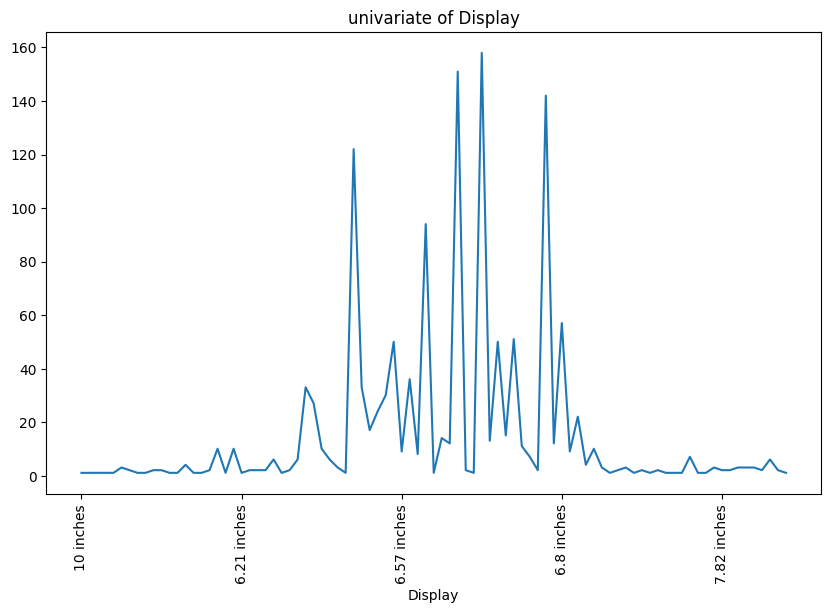

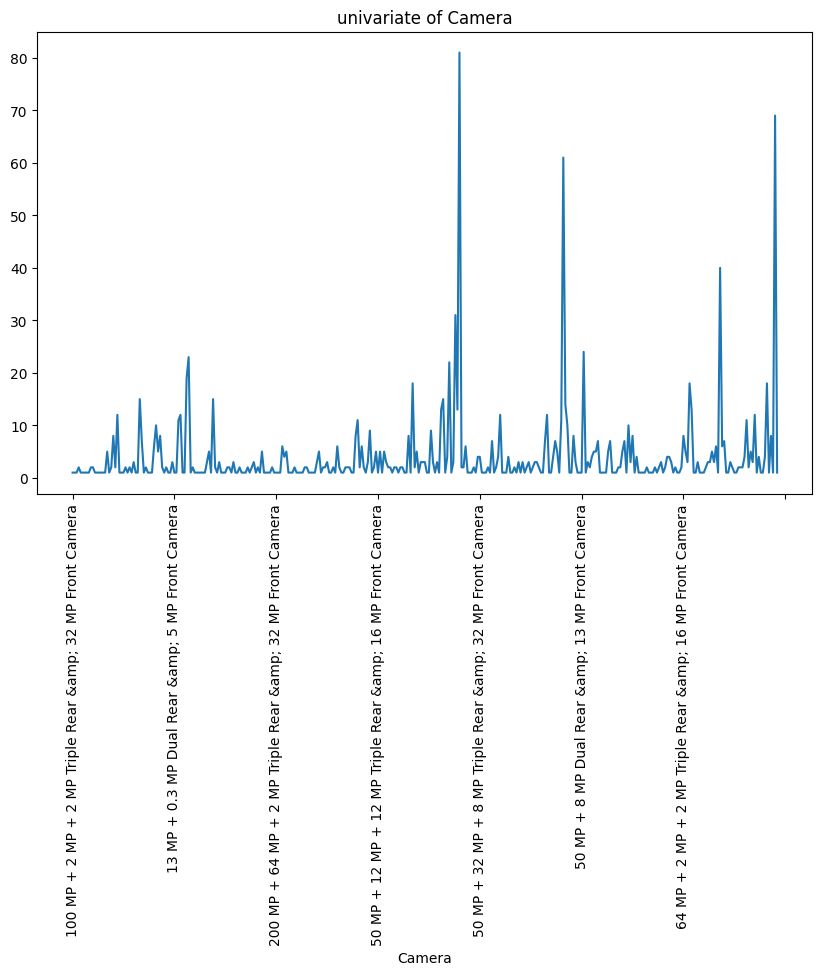

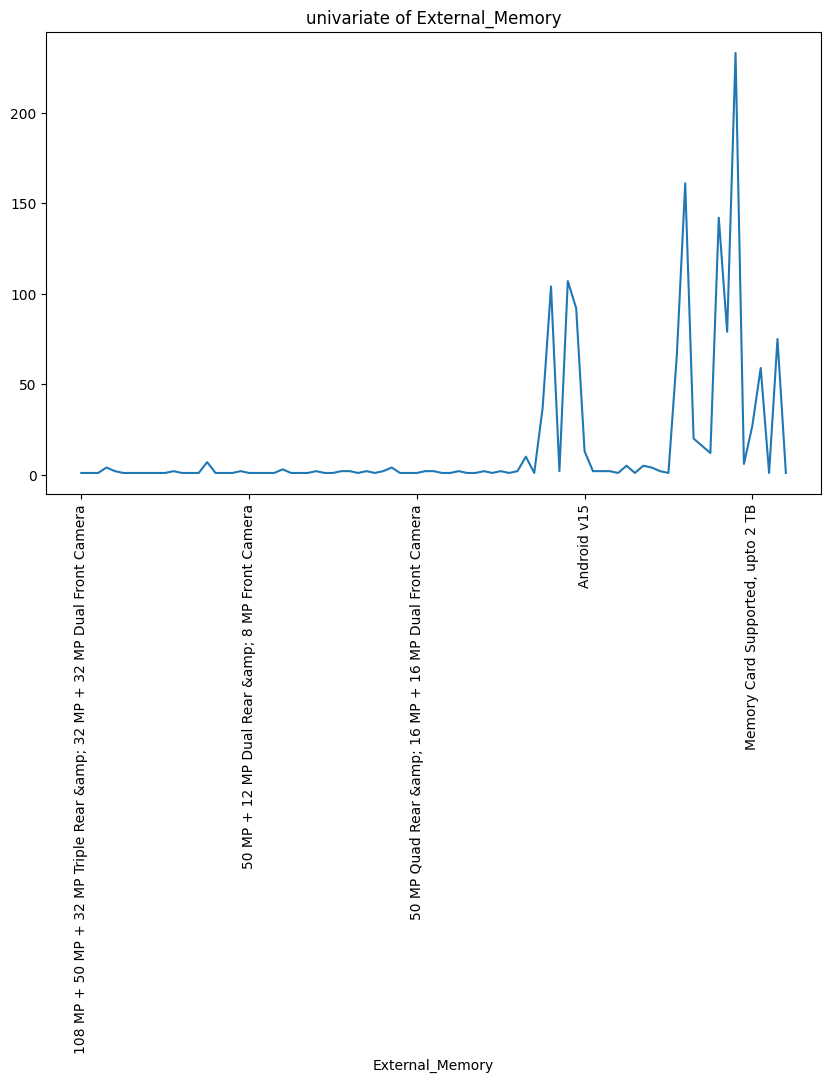

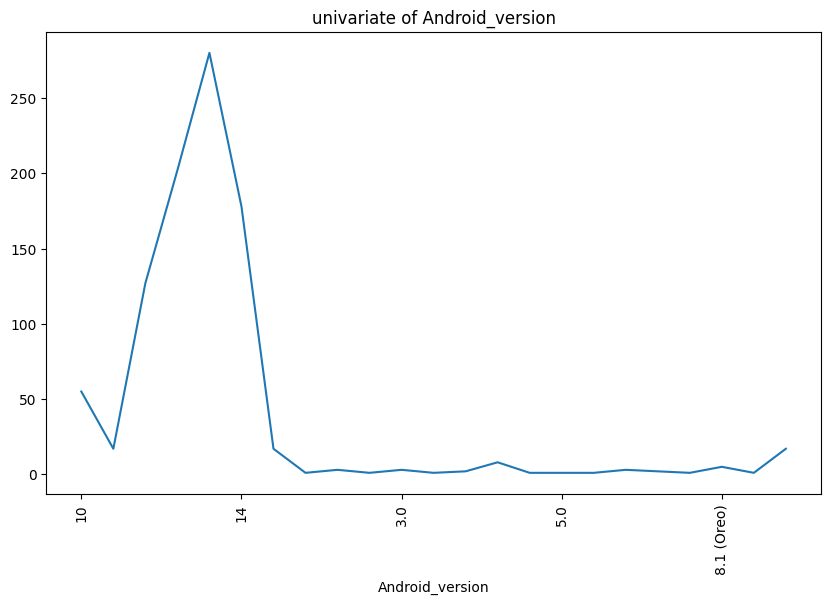

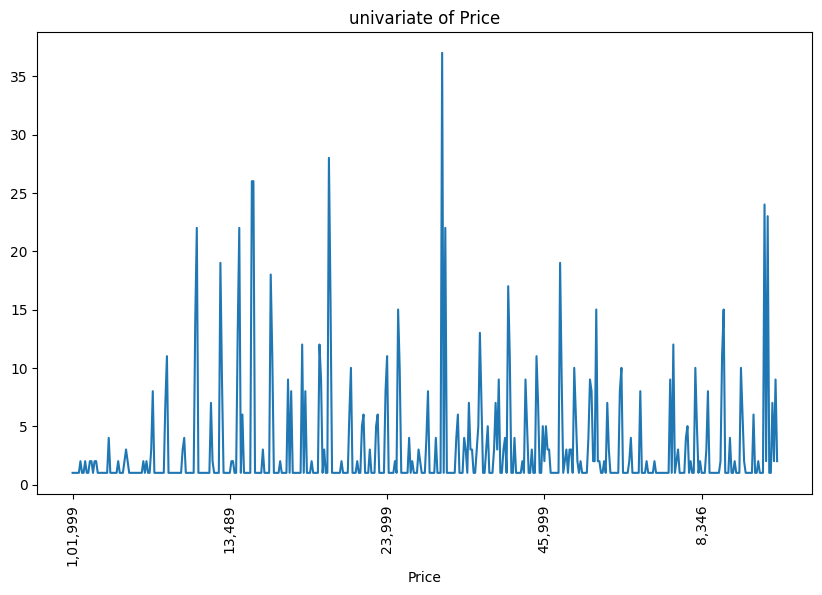

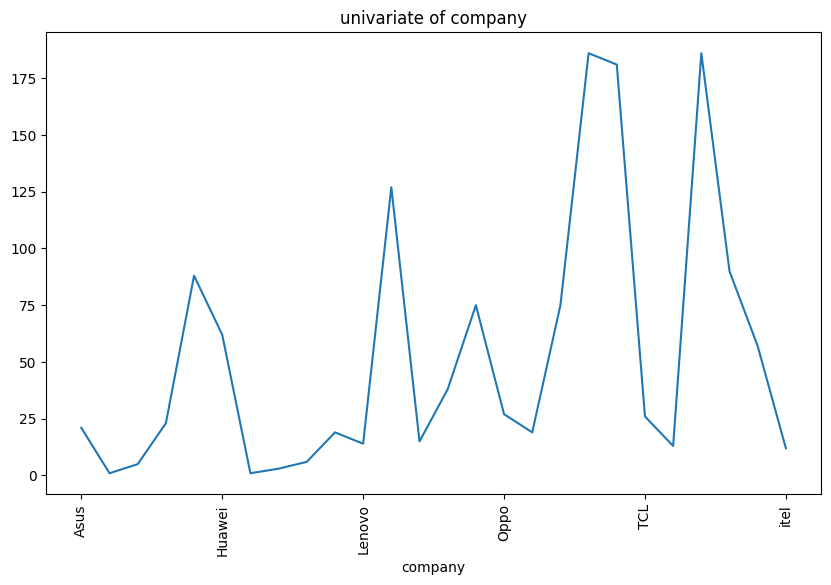

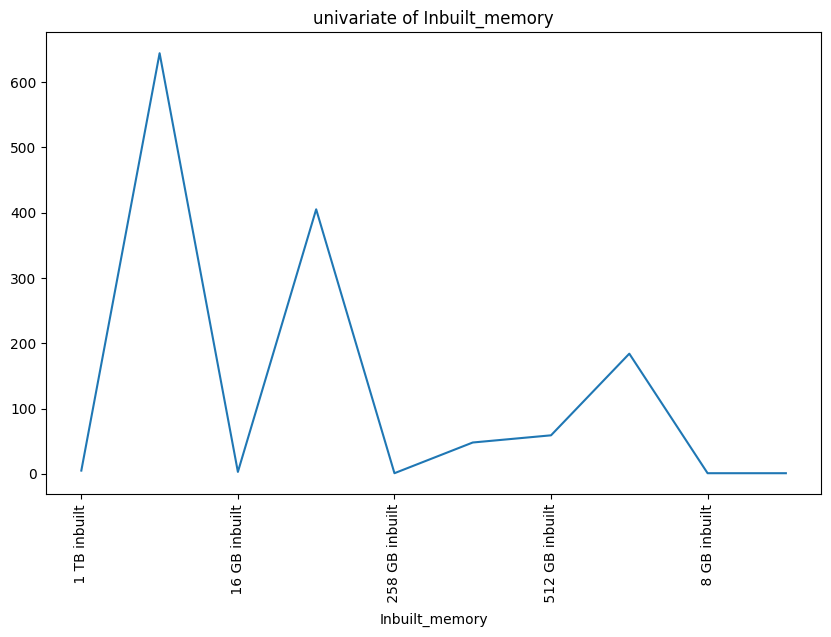

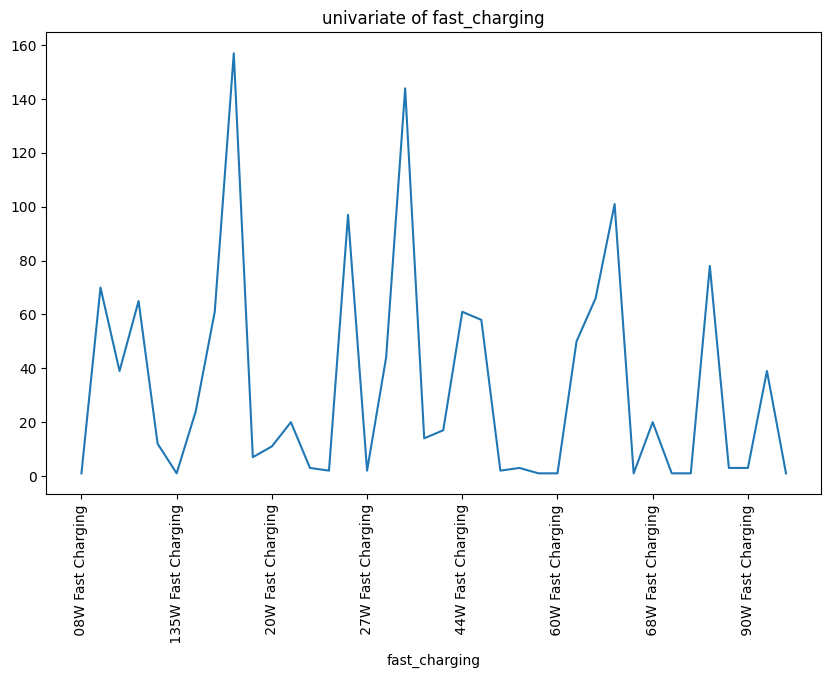

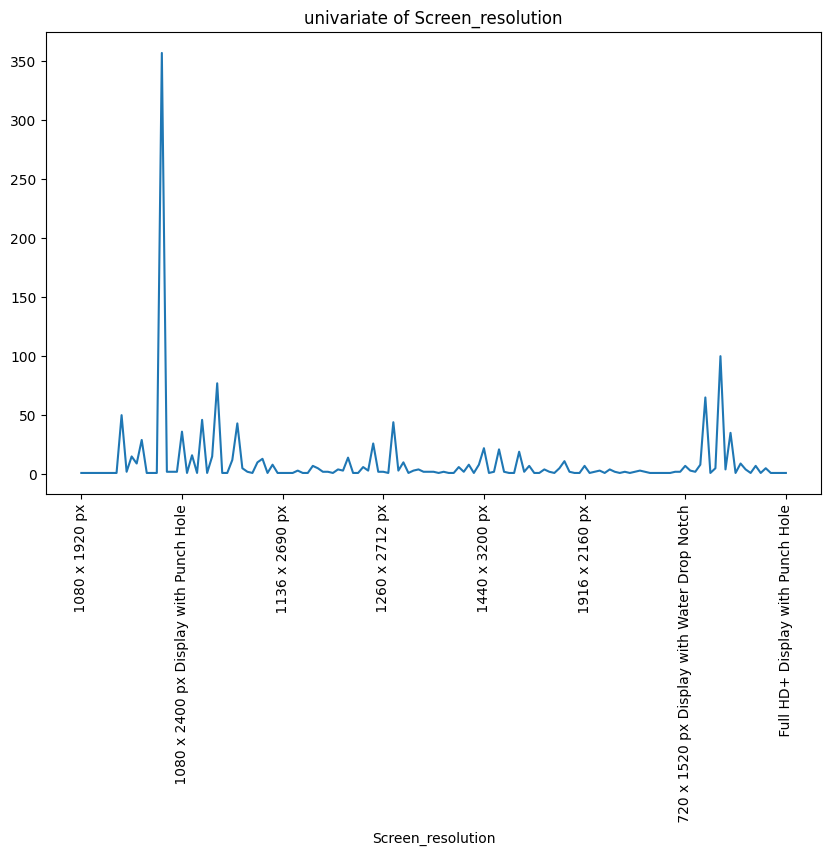

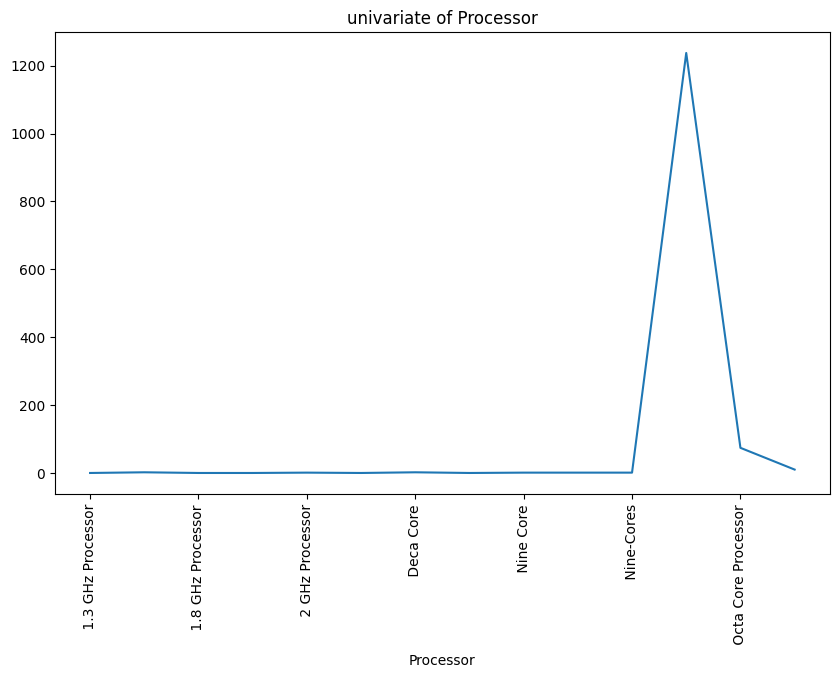

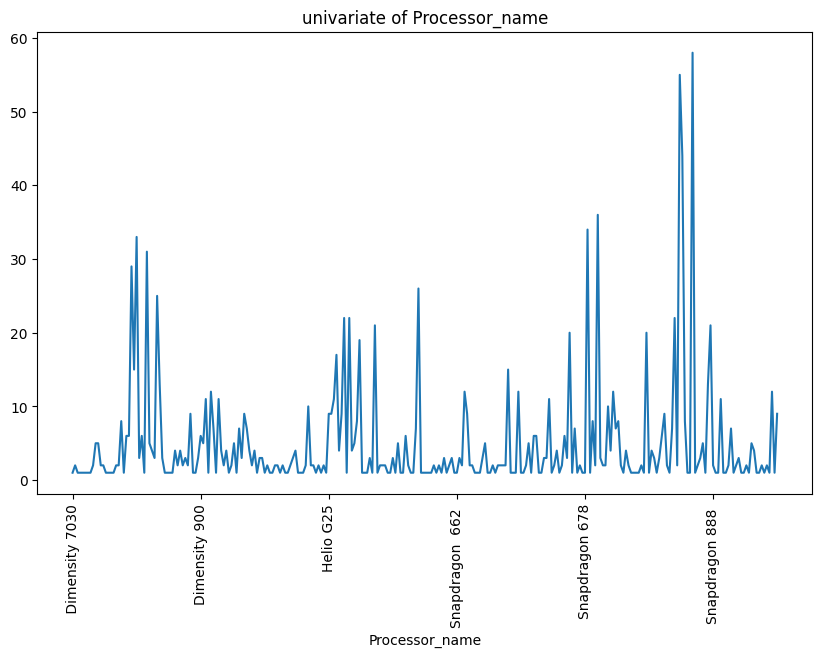

In [777]:
# univariate dilakukan terhadap setiap feature
for column in df.columns:
  plt.figure(figsize=(10, 6))
  df[column].value_counts().sort_index().plot(kind='line')
  plt.title(f'univariate of {column}')
  plt.xticks(rotation=90)
  plt.show()

### bivariate analysis

<Axes: >

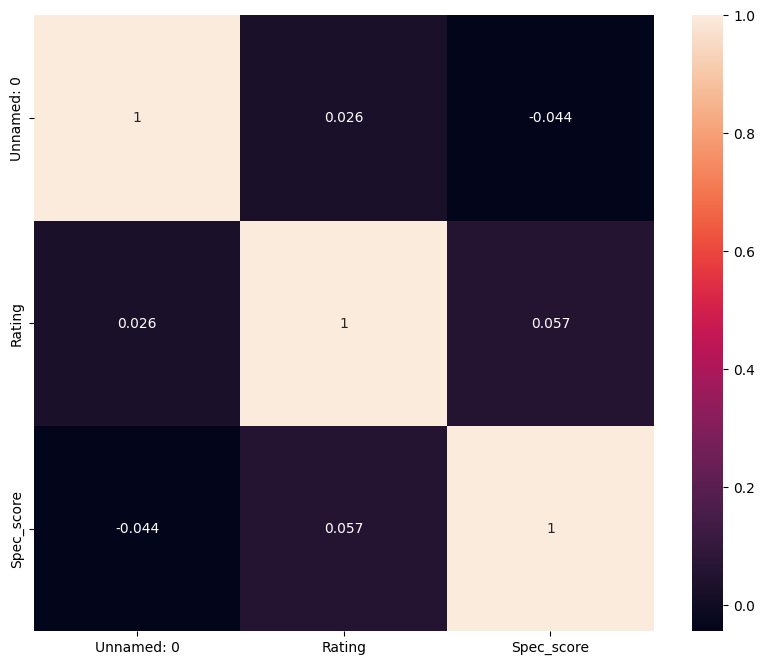

In [778]:
# bivariate analysis
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)

### multivariate analysis

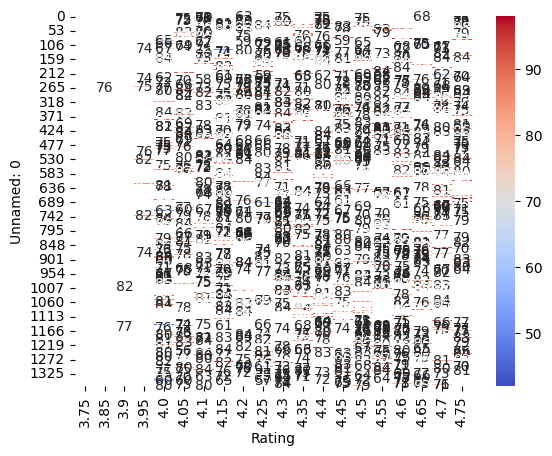

In [779]:
#multivariate Analysis
result = pd.pivot_table(data=df, index = 'Unnamed: 0',columns = 'Rating', values = 'Spec_score')
sns.heatmap(result, annot=True, cmap='coolwarm')
plt.show()

## *EDA*

# **Data Pre-Processing**

kolom 'company', 'Andorid_version', 'External_Memory', 'fast_charging' kita drop karena tidak di gunakan

In [780]:
df_fe = df.drop(columns=['company', 'Android_version', 'External_Memory', 'fast_charging'], axis=1, inplace=False)
df_fe.head(5)


,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,Price,Inbuilt_memory,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"9,999",128 GB inbuilt,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"9,990",32 GB inbuilt,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"11,999",64 GB inbuilt,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"11,999",64 GB inbuilt,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"11,999",64 GB inbuilt,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


tujuan dari kita akan membuat sebuah prediksi apakah sebuah ponsel worth it terhadap spesifikasi yang diberikan

In [781]:
df_fe = df_fe.drop(columns=['Price'])

## *Mengidentifikasi Mean-Median-Modus*

In [782]:
df_numerical = df_fe.select_dtypes(include=[np.number])

for i in df_numerical.columns:
  print(f'Mean {i} : {df_numerical[i].mean()}')
  print(f'Median {i} : {df_numerical[i].median()}')
  print(f'Modus {i} : {df_numerical[i].mode()[0]}')

Mean Unnamed: 0 : 684.5
Median Unnamed: 0 : 684.5
Modus Unnamed: 0 : 0
Mean Rating : 4.374416058394161
Median Rating : 4.4
Modus Rating : 4.15
Mean Spec_score : 80.23430656934306
Median Spec_score : 82.0
Modus Spec_score : 75


## *Handling Dirty Data*

### cek data null dan duplikat

In [783]:
df_fe.isnull().sum()

,0
Unnamed: 0,0
Name,0
Rating,0
Spec_score,0
No_of_sim,0
Ram,0
Battery,0
Display,0
Camera,0
Inbuilt_memory,19


In [784]:
df_fe.drop_duplicates()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,Inbuilt_memory,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,128 GB inbuilt,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,32 GB inbuilt,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,64 GB inbuilt,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,64 GB inbuilt,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,64 GB inbuilt,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1365,TCL 40R,4.05,75,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,64 GB inbuilt,720 x 1612 px,Octa Core,Dimensity 700 5G
1366,1366,TCL 50 XL NxtPaper 5G,4.10,80,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.8 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,128 GB inbuilt,1200 x 2400 px,Octa Core,Dimensity 7050
1367,1367,TCL 50 XE NxtPaper 5G,4.00,80,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,256 GB inbuilt,720 x 1612 px,Octa Core,Dimensity 6080
1368,1368,TCL 40 NxtPaper 5G,4.50,79,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,256 GB inbuilt,720 x 1612 px,Octa Core,Dimensity 6020


### replace data null, error, dan dirubah ke int

data null dan error kita isi dengan modus

In [785]:
# membuat fungsi dan variabel yang memudahkan dalam mengganti data yang tidak sesuai dan error
Ram_regex = r"^(\d+) GB RAM"
Battery_regex = r"^(\d+) mAh Battery\s*$"
Display_regex = r"^(\d+) inches\s*$"
Memory_regex = r"^(\d+) GB inbuilt\s*$"

def Empety_Column_value(value, y):
  if re.match(y, str(value)):
    return value
  else:
    return np.nan


###terdapat data yang tidak sesuai dalam kolom Ram, maka dari itu kita ubah dan isi dengan

In [786]:
df_fe['Ram'] = df_fe['Ram'].apply(lambda x: Empety_Column_value(x, Ram_regex))
df_fe['Ram'] = df_fe['Ram'].replace(np.nan, df_fe['Ram'].mode()[0])
df_fe['Ram'] = df_fe['Ram'].str.replace(' GB RAM', '')
df_fe['Ram'] = df_fe['Ram'].astype(int)
df_fe['Ram'].value_counts()

,count
Ram,
8,549
4,253
12,246
6,214
16,41
3,38
2,22
18,4
24,2


###terdapat data yang tidak sesuai dalam kolom Battery, maka dari itu kita ubah dan isi dengan modus

In [787]:
df_fe['Battery'] = df_fe['Battery'].apply(lambda x: Empety_Column_value(x, Battery_regex))
df_fe['Battery'] = df_fe['Battery'].replace(np.nan, df_fe['Battery'].mode()[0])
df_fe['Battery'] = df_fe['Battery'].str.replace(' mAh Battery', '')
df_fe['Battery'] = df_fe['Battery'].astype(int)
df_fe['Battery'].value_counts()

,count
Battery,
5000,754
4500,117
6000,105
4000,44
4600,33
...,...
3440,1
4250,1
4980,1


###terdapat data yang tidak sesuai dalam kolom Display, maka dari itu kita ubah dan isi dengan modus

In [788]:
df_fe['Display'] = df_fe['Display'].apply(lambda x: Empety_Column_value(x, Display_regex))
df_fe['Display'] = df_fe['Display'].replace(np.nan, df_fe['Display'].mode()[0])
df_fe['Display'] = df_fe['Display'].str.replace(' inches', '')
df_fe['Display'] = df_fe['Display'].astype(int)

###terdapat data yang tidak sesuai dalam kolom Inbuilt_memory, maka dari itu kita ubah dan isi dengan modus

In [789]:
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].replace(' Octa Core', df_fe['Inbuilt_memory'].mode()[0])
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].replace(np.nan, df_fe['Inbuilt_memory'].mode()[0])
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].str.replace('1 TB inbuilt', '1024 GB inbuilt')
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].str.replace(' GB inbuilt', '')
df_fe['Inbuilt_memory'] = df_fe['Inbuilt_memory'].astype(int)

###dalam kolom NO_of_sim tidak terdapat nilai yang tidak normal

In [790]:
df_fe['No_of_sim'].unique()

array(['Dual Sim, 3G, 4G, 5G, VoLTE, ', 'Dual Sim, 3G, 4G, VoLTE, ',
       'Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, ',
       'Single Sim, 3G, 4G, 5G, VoLTE, ', 'Dual Sim, 3G, 4G, ',
       'Single Sim, 3G, 4G, VoLTE, ', 'No Sim Supported, ',
       'Single Sim, 3G, 4G, 5G, VoLTE, Vo5G, ', 'Dual Sim, 3G, VoLTE, '],
      dtype=object)

###dalam kolom camera terdapat nilai yang tidak normal

In [791]:
df_fe['Camera'].unique()
# df_fe['Camera'].info()

array(['50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera',
       '13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Front Camera',
       '50 MP Quad Rear &amp; 8 MP Front Camera',
       '48 MP Quad Rear &amp; 13 MP Front Camera',
       '13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Front Camera',
       '50 MP + 2 MP Dual Rear &amp; 5 MP Front Camera',
       '48 MP + 8 MP + 5 MP Triple Rear &amp; 20 MP Front Camera',
       '48 MP Quad Rear &amp; 8 MP Front Camera',
       '50 MP + 2 MP + 2 MP Triple Rear &amp; 13 MP Front Camera',
       '50 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Front Camera',
       '50 MP + 8 MP + 2 MP Triple Rear &amp; 13 MP Front Camera',
       '50 MP + 8 MP + 2 MP Triple Rear &amp; 8 MP Front Camera',
       '48 MP + 8 MP + 5 MP Triple Rear &amp; 25 MP Front Camera',
       '50 MP + 13 MP + 2 MP Triple Rear &amp; 32 MP Front Camera',
       '64 MP Quad Rear &amp; 20 MP Front Camera',
       '64 MP + 8 MP + 5 MP Triple Rear &amp; 32 MP Front Camera',
       '13 MP + 

In [792]:
df_fe['Camera'] = df_fe['Camera'].str.replace(r'(?i)^((?!MP).)*$', '', regex=True)
df_fe['Camera'] = df_fe['Camera'].replace('', np.nan)
df_fe['Camera'] = df_fe['Camera'].fillna(df_fe['Camera'].mode()[0])
df_fe['Camera']

,Camera
0,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera
1,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...
2,50 MP Quad Rear &amp; 8 MP Front Camera
3,48 MP Quad Rear &amp; 13 MP Front Camera
4,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...
...,...
1365,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...
1366,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera
1367,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera
1368,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...


###screen_resolution

In [793]:
df_fe['Screen_resolution'] = df_fe['Screen_resolution'].str.replace(r'(?i)^((?!px).)*$', '', regex=True)
df_fe['Screen_resolution'] = df_fe['Screen_resolution'].replace('', np.nan)
df_fe['Screen_resolution'] = df_fe['Screen_resolution'].fillna(df_fe['Screen_resolution'].mode()[0])
df_fe['Screen_resolution'].unique()
df_fe['Screen_resolution'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1370 entries, 0 to 1369
Series name: Screen_resolution
Non-Null Count  Dtype 
--------------  ----- 
1370 non-null   object
dtypes: object(1)
memory usage: 10.8+ KB


###Processor

In [794]:
df_fe['Processor'] = df_fe['Processor'].str.replace(' 128 GB inbuilt', '')
df_fe['Processor'] = df_fe['Processor'].replace('', np.nan)
df_fe['Processor'] = df_fe['Processor'].fillna(df_fe['Processor'].mode()[0])

###Processor Name

In [795]:
# df_fe['Processor_name'] = df_fe['Processor_name'].str.replace(' 128 GB inbuilt', '')
# df_fe['Processor_name'] = df_fe['Processor_name'].replace('', np.nan)
df_fe['Processor_name'].unique()

array(['Exynos 1330', 'Octa Core', 'Helio G88', 'Helio P35',
       'Dimensity 700', 'Exynos 9611', 'Exynos  850', 'Exynos 1280',
       'Snapdragon 695', 'Exynos 850', 'Helio P65', 'Octa Core Processor',
       'Snapdragon 680', 'Helio G80', 'Samsung Exynos 7884',
       'Dimensity 6100 Plus', 'Dimensity 700 5G', 'Snapdragon  680',
       'Snapdragon 888', 'Exynos 1380', 'Snapdragon 865', 'Exynos 980',
       'Snapdragon 730', 'Snapdragon 675', 'Snapdragon 7 Gen1',
       'Snapdragon 750G', 'Snapdragon 855+', 'Snapdragon 870',
       'Snapdragon 710', 'Exynos 1480', 'Snapdragon  720G ',
       'Snapdragon 778g', 'Exynos 2200', 'Snapdragon 7+ Gen2',
       'Snapdragon 8 Gen 2', 'Exynos 9825', 'Snapdragon 7s Gen2',
       'Exynos 2100', 'Dimensity 1300', 'Snapdragon 778G+',
       'Snapdragon 778G', 'Exynos 2300', 'Snapdragon 8+ Gen1',
       'Snapdragon 8 Gen3', 'Snapdragon  8+ Gen1', 'Snapdragon  8 Gen1',
       'Exynos 990', 'Snapdragon 855', 'Exynos 8895', 'Exynos  2100',
       'Ex

### Cek outlier dan deskripsi data

In [796]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   int64  
 6   Battery            1370 non-null   int64  
 7   Display            1370 non-null   int64  
 8   Camera             1370 non-null   object 
 9   Inbuilt_memory     1370 non-null   int64  
 10  Screen_resolution  1370 non-null   object 
 11  Processor          1370 non-null   object 
 12  Processor_name     1370 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 139.3+ KB


In [797]:
df_fe_numerical = df_fe.select_dtypes(include=[np.number])

# for col in df_fe_numerical:
#     if df_fe_numerical[col].isnull().sum() == len(df_fe_numerical[col]):
#         continue

#     # Cek distribusi data
#     skewness = df_fe_numerical[col].skew()

#     # Jika distribusi tidak normal, gunakan IQR
#     if abs(skewness) > 0.5:
#         Q1 = df_fe_numerical[col].quantile(0.25)
#         Q3 = df_fe_numerical[col].quantile(0.75)
#         IQR = Q3 - Q1
#         batas_bawah = Q1 - 1.5 * IQR
#         batas_atas = Q3 + 1.5 * IQR

#         outliers = df_fe_numerical[(df_fe_numerical[col] < batas_bawah) | (df_fe_numerical[col] > batas_atas)]

#     # Jika distribusi normal, gunakan Z-score
#     else:
#         df_fe_numerical["z_score"] = (df_fe_numerical[col] - df_fe_numerical[col].mean()) / df_fe_numerical[col].std()
#         outliers = df_fe_numerical[(df_fe_numerical["z_score"] < -3) | (df_fe_numerical["z_score"] > 3)]

#     print(f"Jumlah outlier di {col}: {len(outliers)}")

#     # Handling Outlier
#     replacement_value = df_fe_numerical[col].median()

#     # Imputasi
#     def imputasi_outlier(x):
#         if (x < batas_bawah or x > batas_atas):
#             return replacement_value
#         else:
#             return x

#     df_fe_numerical[col] = df_fe_numerical[col].apply(imputasi_outlier)

#     # df_fe_numerical[col] = df_fe_numerical[col].apply(lambda x: replacement_value if (x < batas_bawah or x > batas_atas) else x)

# for column in df_fe_numerical:
#   plt.figure(figsize=(10, 6))
#   plt.boxplot(df_fe_numerical[column])
#   plt.title(f'Boxplot of {column}')
#   plt.show()

Cek kembali jumlah outlier

In [798]:
# for col in df_fe_numerical:
#     if df_fe_numerical[col].isnull().sum() == len(df_fe_numerical[col]):
#         continue

#     # Cek distribusi data
#     skewness = df_fe_numerical[col].skew()

#     # Jika distribusi tidak normal, gunakan IQR
#     if abs(skewness) > 0.5:
#         Q1 = df_fe_numerical[col].quantile(0.25)
#         Q3 = df_fe_numerical[col].quantile(0.75)
#         IQR = Q3 - Q1
#         batas_bawah = Q1 - 1.5 * IQR
#         batas_atas = Q3 + 1.5 * IQR

#         outliers = df_fe_numerical[(df_fe_numerical[col] < batas_bawah) | (df_fe_numerical[col] > batas_atas)]

#     # Jika distribusi normal, gunakan Z-score
#     else:
#         df_fe_numerical["z_score"] = (df_fe_numerical[col] - df_fe_numerical[col].mean()) / df_fe_numerical[col].std()
#         outliers = df_fe_numerical[(df_fe_numerical["z_score"] < -3) | (df_fe_numerical["z_score"] > 3)]

#     print(f"Jumlah outlier di {col}: {len(outliers)}")

In [799]:
# df_fe_numerical = df_fe_numerical.drop(columns=['z_score'])
df_fe_numerical['Battery'].unique()

array([ 6000,  4000,  5000,  3500,  4500,  3400,  3300,  4050,  3900,
        4300,  4800,  4200,  3700,  4400,  4320,  4030,  1900,  2650,
        3000,  4600,  4100,  5500,  4830,  4700,  4810,  5100,  5400,
        4870,  5700,  4730,  5200,  5240,  5050,  4310,  4350,  4880,
        4520,  4260,  4820,  4805,  5160,  5080,  5065, 10500,  5800,
        5300,  5450,  5600,  2800,  4620,  4385,  4410,  4355,  4492,
        4575,  5003,  4821,  7000,  3760,  2600,  4900,  4020,  4450,
        4610,  3800,  3440,  2510,  6100,  2100,  5020,  4980,  4250,
        4460,  4815,  4750,  5330,  5010])

## *Normalisasi Data*

### Menggunakan Robust scaling

In [800]:
# # menggunakan Robust Scalling
# scaler = RobustScaler()
# df_numerical_scaled = scaler.fit_transform(df_fe_numerical)
# df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns = df_fe_numerical.columns, index = df_fe_numerical.index)

# for i in df_numerical_scaled.columns:
#   plt.figure(figsize=(10, 6))
#   sns.histplot(df_numerical_scaled[i],kde=True)
#   plt.title(f'histplot of {i}')
#   plt.xticks(rotation=90)
#   plt.show()

### Standart Scaling

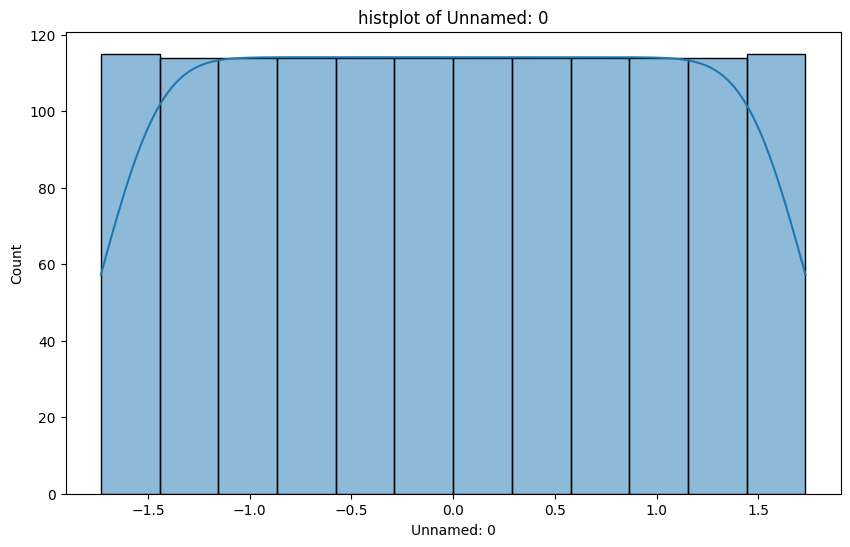

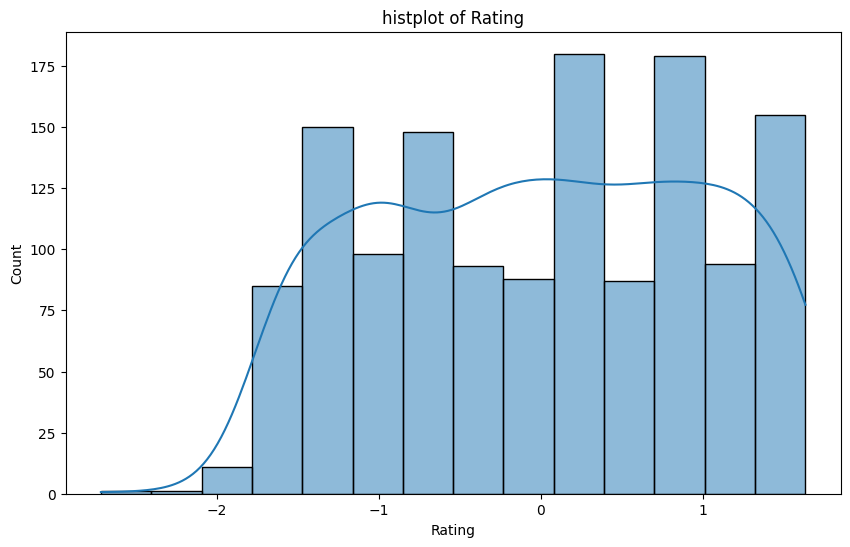

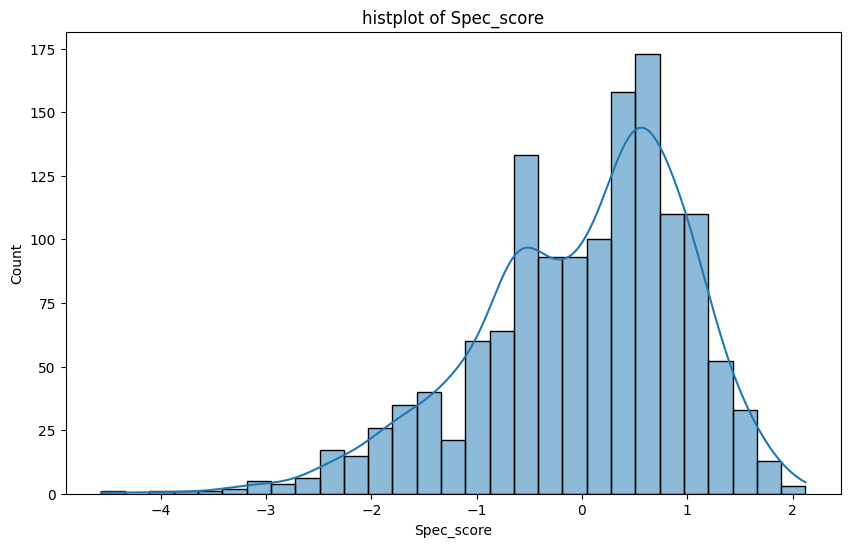

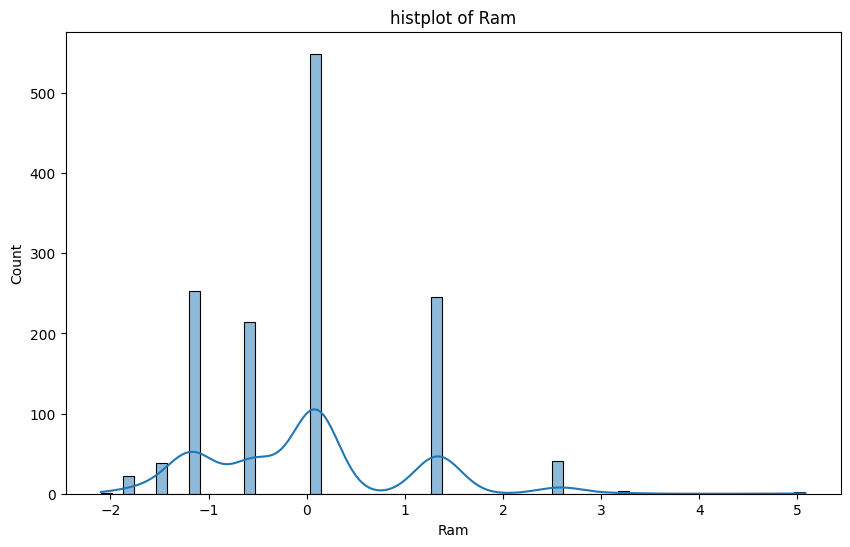

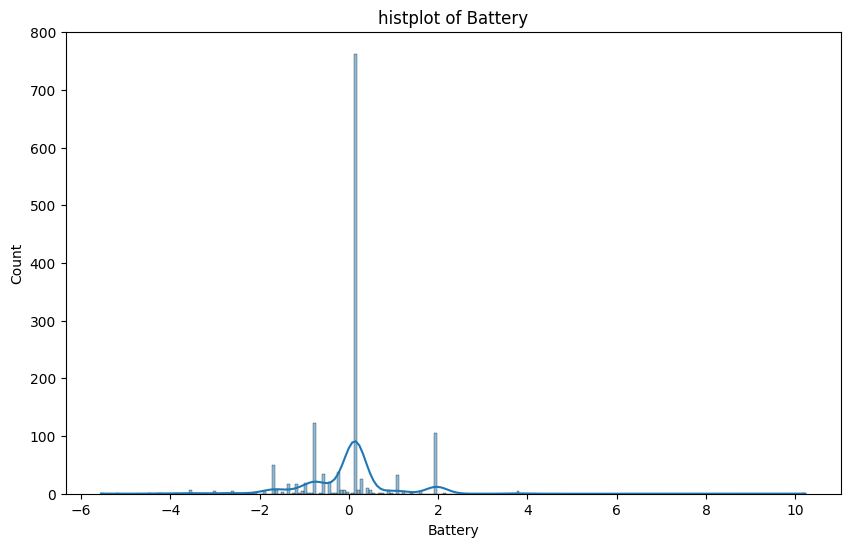

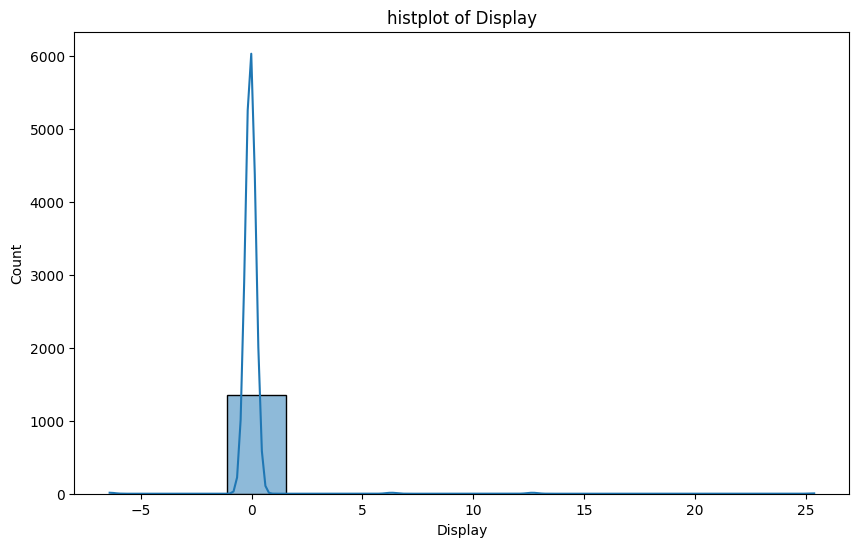

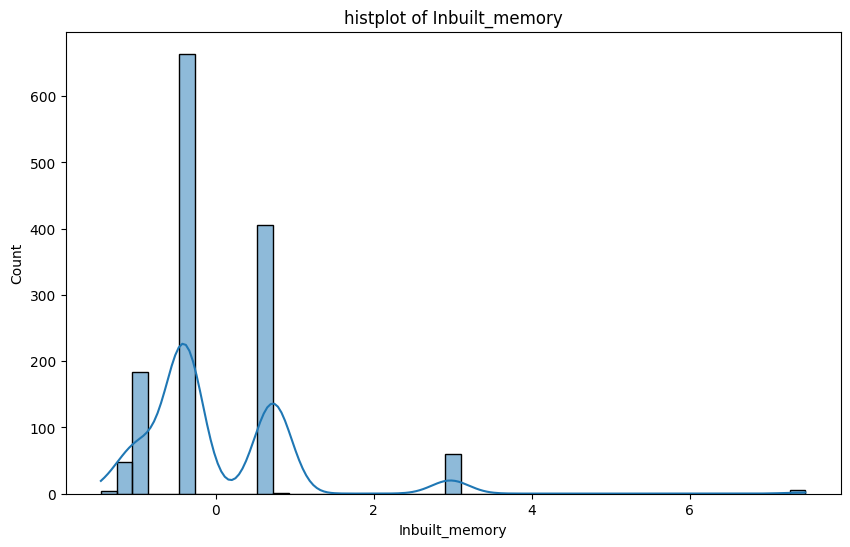

In [804]:
StdScaler = StandardScaler()
StdScaler.fit(df_fe_numerical)
df_numerical_scaled = StdScaler.transform(df_fe_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns = df_fe_numerical.columns, index = df_fe_numerical.index)

for i in df_numerical_scaled.columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(df_numerical_scaled[i],kde=True)
  plt.title(f'histplot of {i}')

### Cek distribusi data

Unnamed: 0: Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0) for Unnamed: 0


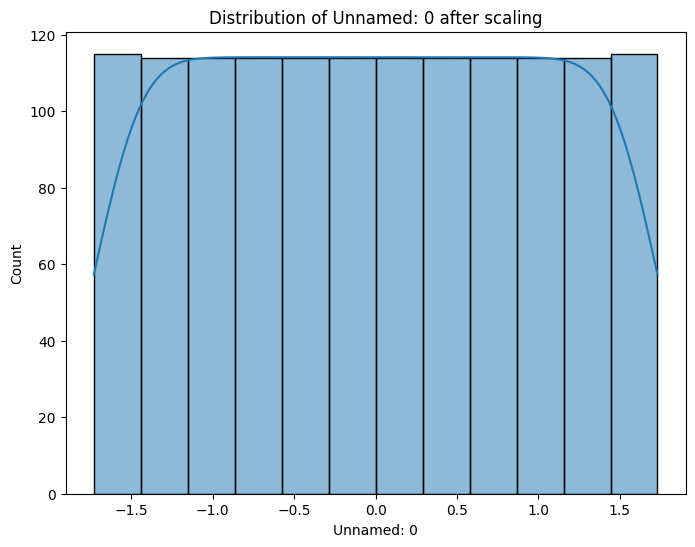

Rating: Statistics=0.956, p=0.000
Sample does not look Gaussian (reject H0) for Rating


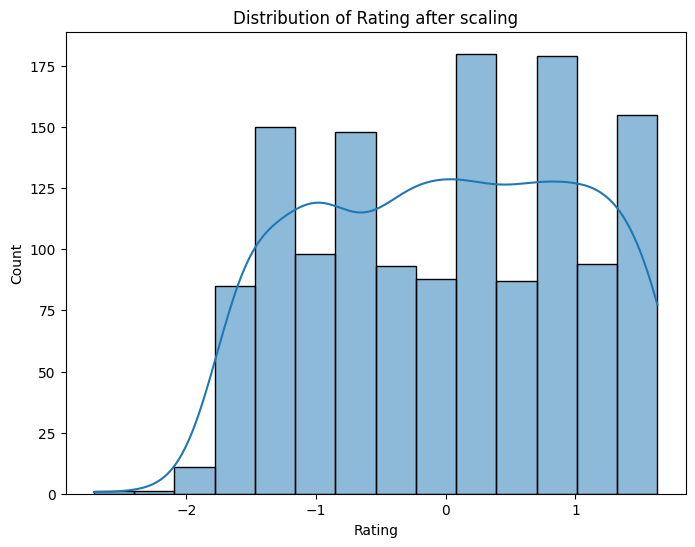

Spec_score: Statistics=0.963, p=0.000
Sample does not look Gaussian (reject H0) for Spec_score


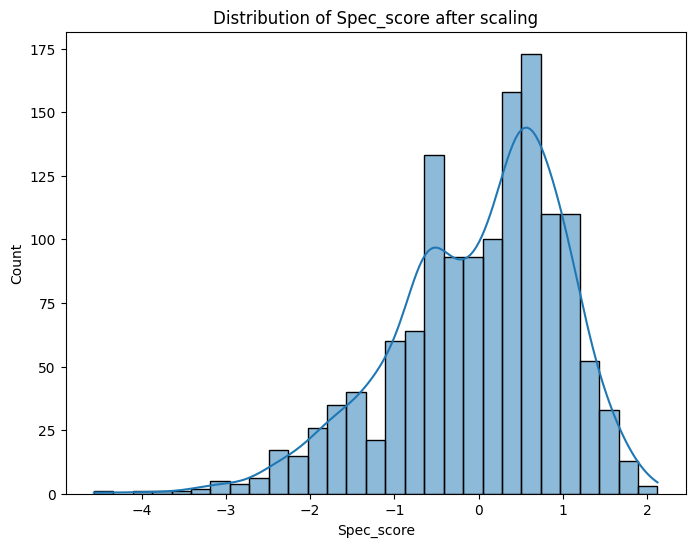

Ram: Statistics=0.896, p=0.000
Sample does not look Gaussian (reject H0) for Ram


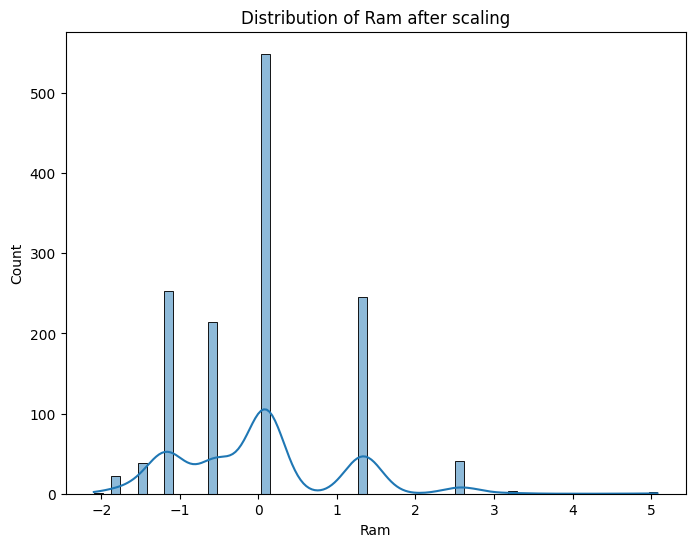

Battery: Statistics=0.797, p=0.000
Sample does not look Gaussian (reject H0) for Battery


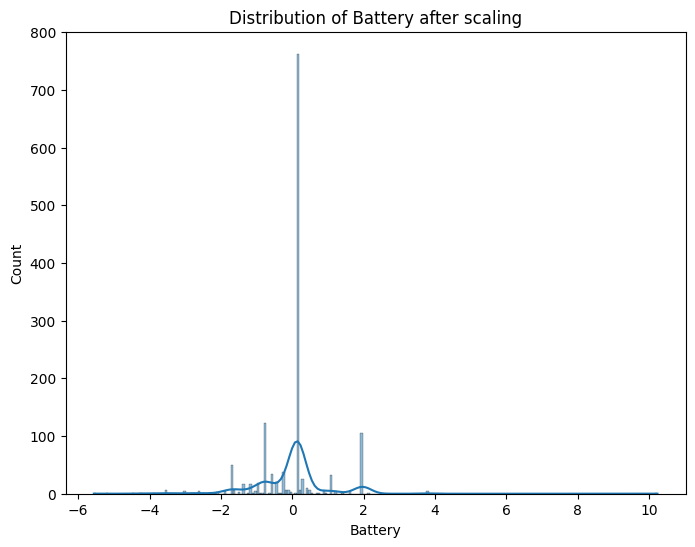

Display: Statistics=0.052, p=0.000
Sample does not look Gaussian (reject H0) for Display


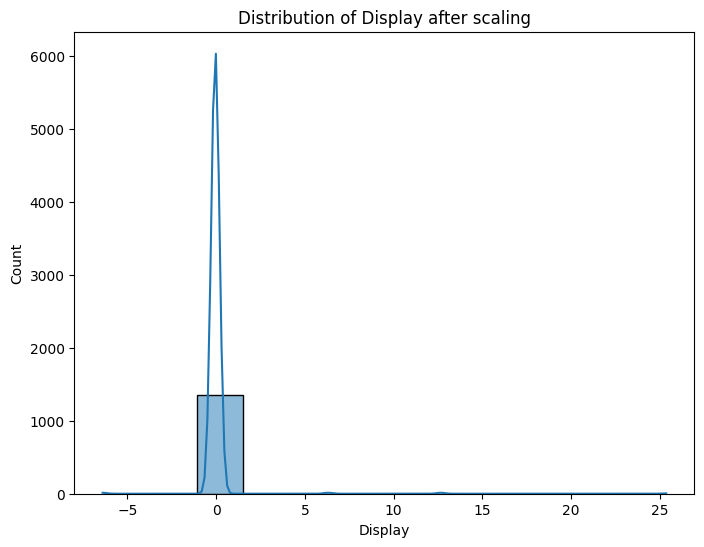

Inbuilt_memory: Statistics=0.722, p=0.000
Sample does not look Gaussian (reject H0) for Inbuilt_memory


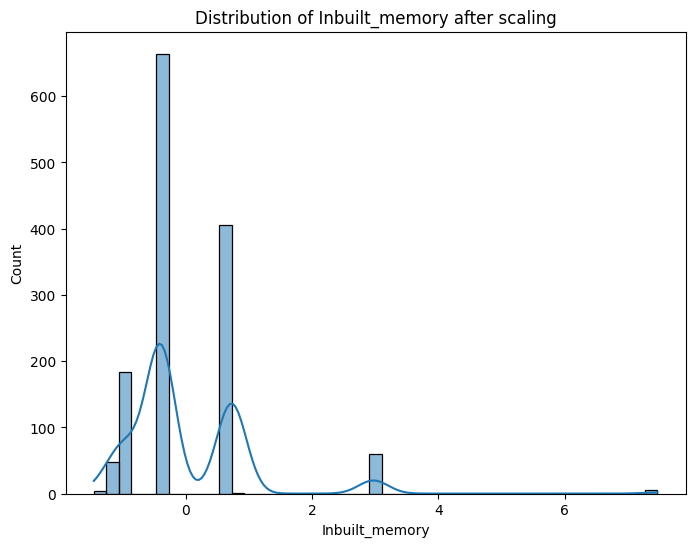

In [802]:
from scipy.stats import shapiro

for col in df_numerical_scaled.columns:
    stat, p = shapiro(df_numerical_scaled[col])
    print(f'{col}: Statistics={stat:.3f}, p={p:.3f}')

    alpha = 0.05
    if p > alpha:
        print(f'Sample looks Gaussian (fail to reject H0) for {col}')
    else:
        print(f'Sample does not look Gaussian (reject H0) for {col}')

    # Visualize the distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df_numerical_scaled[col], kde=True)
    plt.title(f'Distribution of {col} after scaling')
    plt.show()

# Analyze potential issues if data is not normally distributed
# 1. Transformation: Consider transformations like log, square root, Box-Cox
# 2. Robust Scaler: You've already used RobustScaler, which is less sensitive to outliers.
# 3. Different Scaling Method: Explore MinMaxScaler, but be mindful of outliers
# 4. Data Cleaning: Re-examine the data cleaning steps.  Are there still outliers impacting the normality?
# 5. Feature Engineering:  Create new features that might have more normal distributions.


# Example of log transformation if needed
# df_numerical_scaled['col_name'] = np.log1p(df_numerical_scaled['col_name']) # Using log1p to handle 0 values


In [803]:
df_numerical_scaled

,Unnamed: 0,Rating,Spec_score,Ram,Battery,Display,Inbuilt_memory
0,-1.730787,1.197714,-1.461534,-1.160940,1.967685,-0.046384,-0.398905
1,-1.728258,-0.758029,-2.058844,-1.785272,-1.704176,-0.046384,-1.241484
2,-1.725730,-0.323419,-0.625301,-1.160940,0.131754,-0.046384,-0.960625
3,-1.723201,-1.192638,-0.864225,-1.160940,1.967685,-0.046384,-0.960625
4,-1.720673,-1.192638,-1.342072,-1.160940,0.131754,-0.046384,-0.960625
...,...,...,...,...,...,...,...
1365,1.720673,-1.409943,-0.625301,-1.160940,0.131754,-0.046384,-0.960625
1366,1.723201,-1.192638,-0.027991,0.087726,0.131754,-0.046384,-0.398905
1367,1.725730,-1.627247,-0.027991,-0.536607,0.131754,-0.046384,0.724533
1368,1.728258,0.545800,-0.147453,-0.536607,0.131754,-0.046384,0.724533
